# **Data Information Quality Project**


*  ID Project:  3
*  ID Person:   10104067
*  Dataset:     1







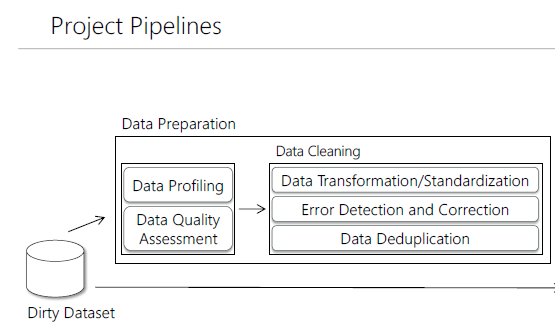

# **1. Data Exploration and Data Quality Assessment**

Import libraries:

In [2]:
import pandas as pd
import numpy as np

Import data:

In [4]:
MOVIES = pd.read_csv("https://raw.githubusercontent.com/lukamath/DIQ_Project/master/movies.csv")
MOVIES

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


Basic operation to inspect data:

In [5]:
#number of tuples and columns of the data source
MOVIES.shape

(9999, 9)

In [6]:
#show the schema of the data source
MOVIES.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [7]:
#for each attribute the system shows the type of data. The type of data is defined analyzing the values
MOVIES.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

VOTES and Gross are not numeric type. I am going to convert them later.


In [8]:
#number of not null values for each column
MOVIES.count()

MOVIES      9999
YEAR        9355
GENRE       9919
RATING      8179
ONE-LINE    9999
STARS       9999
VOTES       8179
RunTime     7041
Gross        460
dtype: int64

The columns MOVIES, STARS and ONE-LINE have no null values as they have 9999 values equal to the number of rows of dataset


# **Duplicated Records**

In [131]:
#seeking duplicate rows with exact matching
DUPLICATES = MOVIES.duplicated()
DUPLICATES

print(DUPLICATES.any())

True


In the dataset there are records that are matching exactly 

In [132]:
MOVIES[DUPLICATES]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


# **Duplicated Titles**

In [10]:
#I check which movie titles have duplicates
MOVIES_COUNT = MOVIES['STARS'].value_counts()
MOVIES_COUNT

STARS
\n                                                                                                                                       456
\n            \n    Stars:\nEmmanuel Esparza, \nEssined Aponte, \nManuel Navarro, \nÁlvaro Benet\n                                        58
\n    Directors:\nRajiv Chilaka, \nKrishna Mohan Chintapatla\n                                                                            49
\n    Director:\nOliver Driver\n| \n    Stars:\nRorrie D. Travis, \nJasmeet Baduwalia, \nJacqueline Scislowski, \nAbraham Rodriguez\n     21
\n            \n    Star:\nMichael J. Woodard\n                                                                                           19
                                                                                                                                        ... 
\n    Director:\nJoe Johnston\n| \n    Stars:\nSam Neill, \nWilliam H. Macy, \nTéa Leoni, \nAlessandro Nivola\n                            1
\n    D

In [11]:
MOVIES['MOVIES'].unique()

array(['Blood Red Sky', 'Masters of the Universe: Revelation',
       'The Walking Dead', ..., ' Totenfrau', ' Arcane',
       ' Heart of Invictus'], dtype=object)

In [12]:
MOVIES['MOVIES'].nunique()

6817

The dataset has 6817 distinct records on 9999 

**COMPLETENESS**

The completeness of a table characterizes the extent to which a table represents the corresponding real world.

Completeness in the relational model can be characterized by the presence of null values. In a model with null values, the presence of a null value has the general meaning of a missing value, i.e., a value that exist in the real-world but it is not available.

*Definition*: The degree to which a given data collection includes the data describing the corresponding set of real-world objects.

*Evaluation*: Number of not null values / Total number of values

First I check if and where there are Nan in the dirty dataset, as is 

In [136]:
#isnull() shows which values are null
MOVIES.isnull()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
9994,False,False,False,True,False,False,True,True,True
9995,False,False,False,True,False,False,True,True,True
9996,False,False,False,True,False,False,True,True,True
9997,False,False,False,True,False,False,True,True,True


In [137]:
MOVIES['Gross'].isnull()

0       True
1       True
2       True
3       True
4       True
        ... 
9994    True
9995    True
9996    True
9997    True
9998    True
Name: Gross, Length: 9999, dtype: bool

In [199]:
#number of null values for each column
MOVIES.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [139]:
#total number of not null values
NOT_NULL = MOVIES.count().sum()
MOVIES.count().sum()

np.int64(73130)

In [140]:
#total number of null values
NULL = MOVIES.isnull().sum().sum()
MOVIES.isnull().sum().sum()

np.int64(16861)

In [141]:
#total number of cells
TOT = MOVIES.shape[0]*MOVIES.shape[1]
TOT

89991

In [142]:
TOT = NOT_NULL + NULL
TOT

np.int64(89991)

The sum of null and not-null is consistent with respect to the total cells of the dataset

Completeness Evaluation:

In [143]:
COMPLETENESS = NOT_NULL / TOT

In [144]:
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

81.3%


**Missing values with a different format**

Exploring the dataset it is possible to assert that there are some values that must be considered as null even if they are not:
*   \n (if it is unique value in cell)
*   \nAdd a Plot\n (this value is repetead in some records under the column "ONE-LINE" instead of a valid values)


Let's proceed and see how the count of null and the completeness are changing

In [13]:
#we added to the set of missing values also '\nAdd a Plot\n' and '\n'
MISSING = ['\nAdd a Plot\n','\n']
MOVIES = pd.read_csv('https://raw.githubusercontent.com/lukamath/DIQ_Project/master/movies.csv', na_values = MISSING)

In [15]:
MOVIES.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE    1265
STARS        456
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Substituting Add Plot and \n Stars and One-Line attributes has null values too now

In [147]:
#Export MOVIES to csv without
import csv
MOVIES = MOVIES.replace({'\n': ''}, regex=True)
# Export DataFrame to a CSV file
file_path = 'Movies2FOutput.csv'
MOVIES.to_csv(file_path, index=False, quoting=csv.QUOTE_MINIMAL) 



In [149]:
MOVIES.isnull()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
9994,False,False,False,True,True,False,True,True,True
9995,False,False,False,True,True,True,True,True,True
9996,False,False,False,True,True,False,True,True,True
9997,False,False,False,True,True,False,True,True,True


The result above of isnull() is already showing how some of the last records are reporting the presence of null values (True) under ONE-LINE (before they reported False)

In [19]:
#total number of new not null values
NOT_NULL2 = MOVIES.count().sum()
MOVIES.count().sum()

np.int64(71409)

In [20]:
#total number of null values after adding different format of null
NULL2 = MOVIES.isnull().sum().sum()
MOVIES.isnull().sum().sum()

np.int64(18582)

Sum check

In [21]:
TOT2 = NOT_NULL2 + NULL2
TOT2

np.int64(89991)

In [22]:
COMPLETENESS2 = NOT_NULL2 / TOT2

In [23]:
COMPLETENESS2 = '{0:.1f}%'.format(COMPLETENESS2*100)
print(COMPLETENESS2)

79.4%


The so calculated completeness is little lower than the previous one

**ACCURACY**

*Definition*: The extent to which data are correct, reliable and certified.

Syntactic Accuracy is the closeness of a value v to the elements of the corresponding definition domain D.

Semantic Accuracy is defined as the closeness between a data value v and a data value v’.

It is possible to calculate the accuracy of an attribute, i.e., attribute (or column) accuracy, of a relation, i.e., relation accuracy, or of a whole database, i.e., database accuracy.

*Evaluation*: Number of accurate values / Total number of values

ACCURACY EVALUATION:

In [25]:
#Function to extract all unique genres from the 'GENRE' column
def extract_unique_genres(df):
    # Split genres by commas and strip spaces, then flatten the list and find unique values
    genres = MOVIES['GENRE'].str.split(',').explode().str.strip().unique()
    return genres
# Extract all unique genres
unique_genres = extract_unique_genres(MOVIES)
unique_genres

#to avoid Null and errors
# def extract_unique_genres(df):
#     # Split genres by commas and strip spaces, then flatten the list and find unique values
#     genres = df['GENRE'].str.split(',').explode().str.strip().dropna().unique()
#     return genres
# # Extract all unique genres
# unique_genres = extract_unique_genres(MOVIES)
# # Print the unique genres as a comma-separated string
# print(", ".join(map(str, unique_genres)))

array(['Action', 'Horror', 'Thriller', 'Animation', 'Adventure', 'Drama',
       'Comedy', 'Crime', 'Romance', 'Mystery', 'Fantasy', 'History',
       'Sci-Fi', 'Biography', 'Family', 'Documentary', 'Music', 'Sport',
       'Short', 'Game-Show', 'Reality-TV', 'Musical', 'War', 'Western',
       'Film-Noir', nan, 'Talk-Show', 'News'], dtype=object)

In [27]:
# Function to check for repeated values in the 'GENRE' column
def check_repeated_genres(row):
    # Handle NaN values in the 'GENRE' column
    if pd.isna(row):
        return []
    
    # Split the genres and strip any leading/trailing spaces
    genres = [genre.strip() for genre in row.split(',')]  
    
    # Find duplicate genres in the list
    duplicates = [genre for genre in genres if genres.count(genre) > 1]
    
    # Return the unique duplicates
    return list(set(duplicates))

# Apply the function to the 'GENRE' column
MOVIES['Repeated Genres'] = MOVIES['GENRE'].apply(check_repeated_genres)

# Filter records with repeated genres
repeated_genres_records = MOVIES[MOVIES['Repeated Genres'].apply(len) > 0]

# Display the records with repeated genres
print(repeated_genres_records)

Empty DataFrame
Columns: [MOVIES, YEAR, GENRE, RATING, ONE-LINE, STARS, VOTES, RunTime, Gross, Repeated Genres]
Index: []


The Accuracy for "GENRE" is 100%: there are not mispelled or duplicated genre for each records

**CONSISTENCY**

The consistency dimension captures the violation of semantic rules defined over (a set of) data items, where items can be tuples of relational tables or records in a file.

Semantic rules can be integrity constaints, data edits or business rules.

*Definition*: The satisfaction of semantic rules defined over a set of data items.

*Evaluation*: Number of consistent tuples / Total number of tuples

In [28]:
#Rule: if votes is not Null then rate must be not null and viceversa
#we add the column consistency
#we assign the value 1 if the rule is satisfied, 0 otherwise

# Create a new column that checks the condition
MOVIES['consistency_rating'] = MOVIES.apply(
    lambda row: 1 if ((pd.notna(row['RATING']) and pd.notna(row['VOTES'])) or 
                      (pd.isna(row['RATING']) and pd.isna(row['VOTES']))) 
               else 0, axis=1)

# Show the resulting DataFrame
# MOVIES.head(30)
MOVIES


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Repeated Genres,consistency_rating
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,[],1
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,[],1
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,[],1
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,[],1
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,[],1
...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,NaN,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,[],1
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,NaN,NaN,NaN,NaN,NaN,[],1
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,[],1
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,NaN,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,[],1


In [29]:
# Count how many records have a consistency_rating of 0
CONSISTENT = MOVIES['consistency_rating']== 1
CONSISTENT = CONSISTENT.sum()
# Print the result
print(f"Number of records with 0 in 'consistency_rating': {CONSISTENT}")

Number of records with 0 in 'consistency_rating': 9999


The consistency valuated on the basis of the rule that if there is a rating there be at least a vote and viceversa is 100%

**2. DATA PROFILING**

Data profiling is the set of activities and processes designed to determine the metadata of a given dataset.

Data profiling helps understand and prepare data for subsequent cleaning, integration, and analysis.

In [30]:
MOVIES.dtypes


MOVIES                 object
YEAR                   object
GENRE                  object
RATING                float64
ONE-LINE               object
STARS                  object
VOTES                  object
RunTime               float64
Gross                  object
Repeated Genres        object
consistency_rating      int64
dtype: object

In [31]:
MOVIES['VOTES'] = MOVIES['VOTES'].str.replace(',', '', regex=True)
MOVIES['VOTES'] = pd.to_numeric(MOVIES['VOTES'], errors='coerce')  # Convert to numeric (keeps NaN)
# MOVIES['VOTES'] = MOVIES['VOTES'].fillna(0).astype(int)  # Fill NaN with 0 and convert
# MOVIES['VOTES'] = MOVIES['VOTES'].astype(int)
MOVIES.dtypes

MOVIES                 object
YEAR                   object
GENRE                  object
RATING                float64
ONE-LINE               object
STARS                  object
VOTES                 float64
RunTime               float64
Gross                  object
Repeated Genres        object
consistency_rating      int64
dtype: object

**Uniqueness and Distinctness** 


*Attribute:    MOVIES*

In [163]:
#Total rows
rows=MOVIES.shape[0]
rows

9999

In [164]:
#not null titles of movie
count_movies=MOVIES['MOVIES'].count()
count_movies

np.int64(9999)

In [165]:
MOVIES['MOVIES'].value_counts()

MOVIES
 Bleach: Burîchi                         65
 Mighty Little Bheem                     64
 Avatar: The Last Airbender              61
 La Reina de Indias y el Conquistador    60
 Dexter                                  48
                                         ..
Halston                                   1
Castle Rock                               1
 Totenfrau                                1
 Arcane                                   1
 Shûmatsu no Valkyrie                     1
Name: count, Length: 6817, dtype: int64

In [166]:
distinct_movies=MOVIES['MOVIES'].nunique()
distinct_movies

6817

_Uniqueness = Distinct / Row_

In [167]:
uniqueness_movies=distinct_movies/rows
print(f"Uniqueness for 'Movies': {uniqueness_movies}")

Uniqueness for 'Movies': 0.6817681768176818


_Distinctness = Distinct / Count_

In [168]:
distinctness_movies=distinct_movies/count_movies
print(f"Distinctness for 'Movies': {distinctness_movies}")

Distinctness for 'Movies': 0.6817681768176818


**Attribute:    YEAR**

In [170]:
#not null years
count_year=MOVIES['YEAR'].count()
count_year

np.int64(9355)

In [231]:
MOVIES['YEAR'].value_counts()

YEAR
(2020– )             892
(2021– )             658
(2020)               639
(2019– )             549
(2019)               544
                    ... 
(III) (2011)           1
(VI) (2016)            1
(2001 TV Movie)        1
(1985– )               1
(2003 TV Special)      1
Name: count, Length: 438, dtype: int64

In [172]:
distinct_year=MOVIES['YEAR'].nunique()
distinct_year

438

In [173]:
uniqueness_year=distinct_year/rows
print(f"Uniqueness for 'Year': {uniqueness_year}")

Uniqueness for 'Year': 0.043804380438043806


In [174]:
distinctness_year=distinct_year/count_year
print(f"Distinctness for 'Year': {distinctness_year}")

Distinctness for 'Year': 0.04681988241582042


In [175]:
#find max of value counts (attribute "year")
MAX_COUNTS = max(MOVIES['YEAR'].value_counts())
MAX_COUNTS

892

_Constancy_

In [176]:
#for attribute "ibu"
CONSTANCY = MAX_COUNTS / count_year
print("CONSTANCY: ", CONSTANCY)

CONSTANCY:  0.09535008017103154


<Axes: >

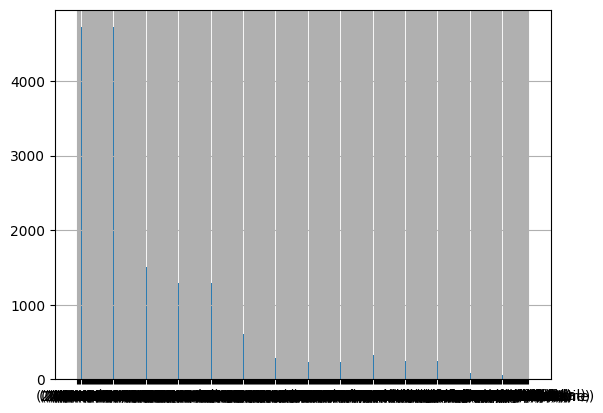

In [177]:
MOVIES['YEAR'].hist()

In [232]:
MOVIES.describe()

,RATING,VOTES,RunTime
count,8179.000000,8.179000e+03,7041.000000
mean,6.921176,1.512406e+04,68.688539
std,1.220232,7.005458e+04,47.258056
min,1.100000,5.000000e+00,1.000000
25%,6.200000,1.660000e+02,36.000000
50%,7.100000,7.890000e+02,60.000000
75%,7.800000,3.772000e+03,95.000000
max,9.900000,1.713028e+06,853.000000


In [179]:
#Select Movies with RunTime =1 
MOVIES[MOVIES['RunTime'] == 1]


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
2854,Horsin' Around,(2014 Video),"Short, Comedy, Music",7.4,The opening title sequence to the spoof 90s si...,NaN,627.0,1.0,NaN
2954,Trollhunters: Happy Birthday to You!,(2017 TV Special),"Animation, Short",7.5,What's better than a birthday? How about a cho...,NaN,24.0,1.0,NaN
3378,13 Reasons Why: Season 2 Date Announcement Com...,(2018),"Short, Drama",7.2,NaN,Director:Greg Jardin| Stars:Alisha Boe...,197.0,1.0,NaN
3977,Miraculous: Ladybug & Cat Noir: Happy Birthday...,(2017 TV Special),"Animation, Short",7.3,"Break dancing, dragons, balloons and a DJ: Lad...",NaN,34.0,1.0,NaN
4129,Piggy Tales,(2014–2018),"Animation, Adventure, Comedy",7.2,A cartoon series of green cartoon piggies.,"Stars:Antti Pääkkönen, Antti P...",110.0,1.0,NaN
5358,Pokémon: Happy Birthday to You!,(2017 TV Special),"Animation, Short",5.4,"Today is your big day, and Ash, Pikachu and al...",NaN,21.0,1.0,NaN
5446,My Little Pony: Happy Birthday to You!,(2017 TV Special),"Animation, Short",NaN,"Did someone say ""birthday""? Fluttershy and Pin...",NaN,NaN,1.0,NaN
5682,Barbie: Happy Birthday to You!,(2017 TV Special),"Animation, Short",4.1,Get ready to make a wish and have the most ama...,"Stars:Ritesh Rajan, America Young",8.0,1.0,NaN
5854,LEGO Ninjago: Masters of Spinjitzu: Happy Birt...,(2017 TV Special),"Animation, Short, Action",5.9,"LEGO Ninjago heroes Kai, Zane, Jay and Cole wa...",NaN,10.0,1.0,NaN
5872,Beat Bugs: Happy Birthday to You!,(2017 TV Special),"Animation, Short",NaN,They say it's your birthday - and there's no o...,NaN,NaN,1.0,NaN


In [32]:
#display numeric columns
NUM = list(MOVIES.select_dtypes(include=['int64','float64']).columns)
NUM

['RATING', 'VOTES', 'RunTime', 'consistency_rating']

In [234]:
#MOVIES[MOVIES['Gross'].notnull() & MOVIES['Gross'].str.endswith('M')]
MOVIES[MOVIES['Gross'].notnull()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Re...,205979.0,118.0,$75.47M
85,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,Director:Steven Spielberg| Stars:Sam N...,897444.0,127.0,$402.45M
95,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...",Director:Fede Alvarez| Stars:Stephen L...,237601.0,88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,Director:Peter Jackson| Stars:Elijah W...,1713028.0,178.0,$315.54M
125,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,Director:Adam Robitel| Stars:Taylor Ru...,99351.0,99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,Director:Craig Teper| Stars:Beverly Ad...,245.0,90.0,$0.09M
5770,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnul...,331.0,75.0,$0.00M
5835,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...",Director:Gotham Chopra| Stars:Deepak C...,124.0,83.0,$0.01M
6056,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Pa...,111.0,86.0,$0.01M


In [207]:
MOVIES[MOVIES['Gross'].notnull() & MOVIES['Gross'].str.startswith('$')]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"Action, Comedy, Crime",6.9,"The world's top bodyguard gets a new client, a...",Director:Patrick Hughes| Stars:Ryan Re...,205979.0,118.0,$75.47M
85,Jurassic Park,(1993),"Action, Adventure, Sci-Fi",8.1,A pragmatic paleontologist visiting an almost ...,Director:Steven Spielberg| Stars:Sam N...,897444.0,127.0,$402.45M
95,Don't Breathe,(2016),"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...",Director:Fede Alvarez| Stars:Stephen L...,237601.0,88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,Director:Peter Jackson| Stars:Elijah W...,1713028.0,178.0,$315.54M
125,Escape Room,(I) (2019),"Action, Adventure, Horror",6.4,Six strangers find themselves in a maze of dea...,Director:Adam Robitel| Stars:Taylor Ru...,99351.0,99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,(2010),Documentary,6.5,Vidal Sassoon is more than just a hairdresser-...,Director:Craig Teper| Stars:Beverly Ad...,245.0,90.0,$0.09M
5770,Men at Lunch,(2012),"Documentary, Mystery",6.3,"The story of ""Lunch atop a Skyscraper,"" the ic...",Director:Seán Ó Cualáin| Stars:Fionnul...,331.0,75.0,$0.00M
5835,Decoding Deepak,(2012),Documentary,5.5,"Deepak Chopra's son, Gotham, spends a year tra...",Director:Gotham Chopra| Stars:Deepak C...,124.0,83.0,$0.01M
6056,Theo Who Lived,(2016),Documentary,6.8,A documentary on American journalist Theo Padn...,Director:David Schisgall| Star:Theo Pa...,111.0,86.0,$0.01M


In [235]:
# I check with a regex if all the notnull Gross are in the same format $xxx.xxM
df = pd.DataFrame(MOVIES['Gross'])
df['Numeric'] = df['Gross'].str.match(r'^\$[0-9]+(\.[0-9]+)?M$')
print(df[df['Gross'].notnull()])

         Gross Numeric
77     $75.47M    True
85    $402.45M    True
95     $89.22M    True
111   $315.54M    True
125    $57.01M    True
...        ...     ...
5750    $0.09M    True
5770    $0.00M    True
5835    $0.01M    True
6056    $0.01M    True
6292    $0.14M    True

[460 rows x 2 columns]


We have 460 not null and all 460 are in the same format (in million dollar)
I can remove $ and M and convert in Gross in float 

In [236]:
MOVIES['Gross'] = MOVIES['Gross'].str.replace(r'[$M]', '', regex=True)
MOVIES['Gross'] = pd.to_numeric(MOVIES['Gross'], errors='coerce')  # Convert to numeric (keeps NaN)
# MOVIES['Gross'] = MOVIES['Gross'].fillna(0).astype(int)  # Fill NaN with 0 and convert
# MOVIES['Gross'] = MOVIES['Gross'].astype(int)

In [237]:
MOVIES[MOVIES['Gross'].notnull()]


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross


In [238]:
MOVIES.dtypes



MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross       float64
dtype: object

In [221]:
#display numeric columns
NUM = list(MOVIES.select_dtypes(include=['int64','float64']).columns)
NUM

['RATING', 'VOTES', 'RunTime', 'Gross']

In [222]:
#correlation evaluation base on pearson correlation coefficient
MOVIES[NUM].corr(method='pearson')

,RATING,VOTES,RunTime,Gross
RATING,1.000000,0.103435,-0.223826,NaN
VOTES,0.103435,1.000000,0.143464,NaN
RunTime,-0.223826,0.143464,1.000000,NaN
Gross,NaN,NaN,NaN,NaN


In [188]:
#correlation evaluation base on kendall correlation coefficient
MOVIES[NUM].corr(method ='kendall')

,RATING,VOTES,RunTime,Gross
RATING,1.000000,0.005234,-0.255290,NaN
VOTES,0.005234,1.000000,0.239897,NaN
RunTime,-0.255290,0.239897,1.000000,NaN
Gross,NaN,NaN,NaN,NaN


In [189]:
#correlation evaluation base on spearman correlation coefficient
corr = MOVIES[NUM].corr(method ='spearman')
corr

,RATING,VOTES,RunTime,Gross
RATING,1.000000,0.007687,-0.383519,NaN
VOTES,0.007687,1.000000,0.346571,NaN
RunTime,-0.383519,0.346571,1.000000,NaN
Gross,NaN,NaN,NaN,NaN


In [225]:
MOVIES.count()

MOVIES      9999
YEAR        9355
GENRE       9919
RATING      8179
ONE-LINE    8734
STARS       9543
VOTES       8179
RunTime     7041
Gross          0
dtype: int64

In [227]:
MOVIES[MOVIES['Gross'].notnull()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
